# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 580


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
units = "metric"
url = f"http://api.openweathermap.org/data/2.5/weather?units={units}&appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lihue
Processing Record 2 of Set 1 | chibougamau
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | bereeda
Processing Record 5 of Set 1 | port alfred
Processing Record 6 of Set 1 | moyale
Processing Record 7 of Set 1 | fale old settlement
Processing Record 8 of Set 1 | olonkinbyen
Processing Record 9 of Set 1 | thompson
Processing Record 10 of Set 1 | remire-montjoly
Processing Record 11 of Set 1 | george town
Processing Record 12 of Set 1 | talara
Processing Record 13 of Set 1 | ad dilam
Processing Record 14 of Set 1 | puerto eldorado
Processing Record 15 of Set 1 | waitangi
Processing Record 16 of Set 1 | barranca
Processing Record 17 of Set 1 | la ronge
Processing Record 18 of Set 1 | badger
Processing Record 19 of Set 1 | newman
Processing Record 20 of Set 1 | castillos
Processing Record 21 of Set 1 | margaret river
Processing Record 22 of Set 1 | bilibino
Proces

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          553
Lat           553
Lng           553
Max Temp      553
Humidity      553
Cloudiness    553
Wind Speed    553
Country       553
Date          553
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,lihue,21.9789,-159.3672,29.58,74,40,5.14,US,1696027976
1,chibougamau,49.9168,-74.3659,18.79,52,0,3.09,CA,1696028003
2,port-aux-francais,-49.3500,70.2167,1.00,71,10,18.77,TF,1696027956
3,bereeda,11.8704,51.0579,27.09,71,15,1.59,SO,1696028514
4,port alfred,-33.5906,26.8910,16.77,83,89,3.10,ZA,1696027970


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lihue,21.9789,-159.3672,29.58,74,40,5.14,US,1696027976
1,chibougamau,49.9168,-74.3659,18.79,52,0,3.09,CA,1696028003
2,port-aux-francais,-49.3500,70.2167,1.00,71,10,18.77,TF,1696027956
3,bereeda,11.8704,51.0579,27.09,71,15,1.59,SO,1696028514
4,port alfred,-33.5906,26.8910,16.77,83,89,3.10,ZA,1696027970


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

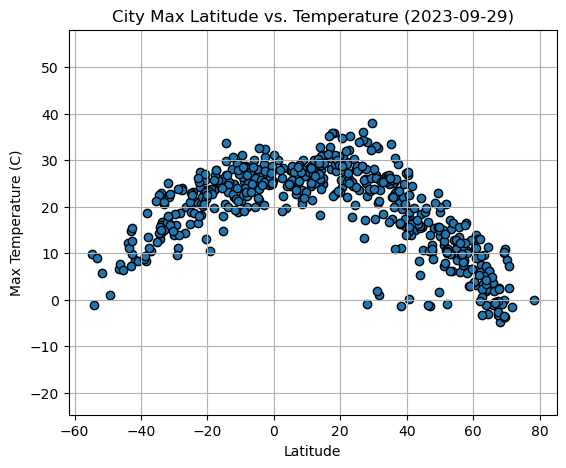

In [8]:
# Build scatter plot for latitude vs. temperature
latitudes = city_data_df["Lat"]
temperature = city_data_df["Max Temp"]
plt.figure(figsize=(6.3,5))
plt.scatter(latitudes,temperature,edgecolor="black") 

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Temperature "+ time.strftime("(%Y-%m-%d)"))
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.xlim(min(latitudes)-7,max(latitudes)+7)
plt.ylim(min(temperature)-20,max(temperature)+20)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

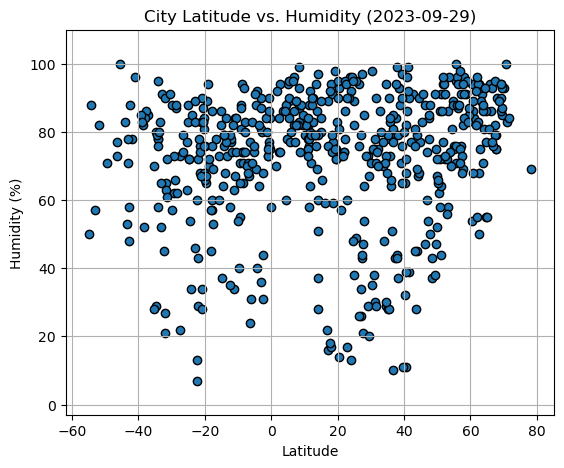

In [9]:
# Build the scatter plots for latitude vs. humidity
latitudes = city_data_df["Lat"]
humidity = city_data_df["Humidity"]
plt.figure(figsize=(6.3,5))
plt.scatter(latitudes,humidity,edgecolor="black") 

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity "+ time.strftime("(%Y-%m-%d)"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.xlim(min(latitudes)-7,max(latitudes)+7)
plt.ylim(min(humidity)-10,max(humidity)+10)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

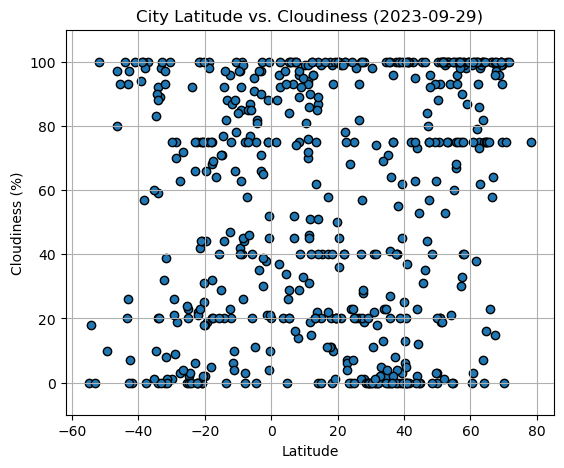

In [10]:
# Build the scatter plots for latitude vs. humidity
latitudes = city_data_df["Lat"]
cloudiness = city_data_df["Cloudiness"]
plt.figure(figsize=(6.3,5))
plt.scatter(latitudes,cloudiness,edgecolor="black") 

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("(%Y-%m-%d)"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.xlim(min(latitudes)-7,max(latitudes)+7)
plt.ylim(min(cloudiness)-10,max(cloudiness)+10)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()


#### Latitude Vs. Cloudiness

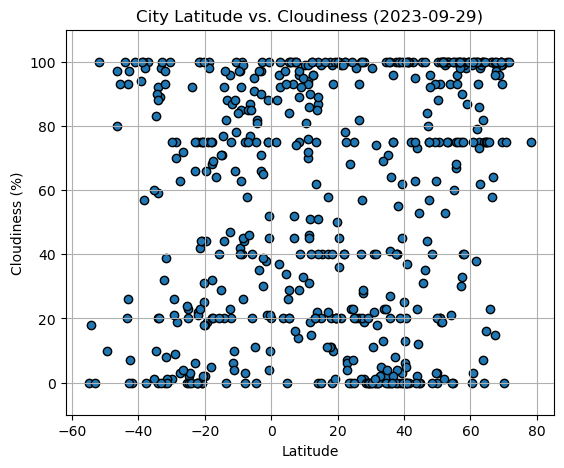

In [11]:
# Build the scatter plots for latitude vs. cloudiness
latitudes = city_data_df["Lat"]
cloudiness = city_data_df["Cloudiness"]
plt.figure(figsize=(6.3,5))
plt.scatter(latitudes,cloudiness,edgecolor="black") 

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("(%Y-%m-%d)"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.xlim(min(latitudes)-7,max(latitudes)+7)
plt.ylim(min(cloudiness)-10,max(cloudiness)+10)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

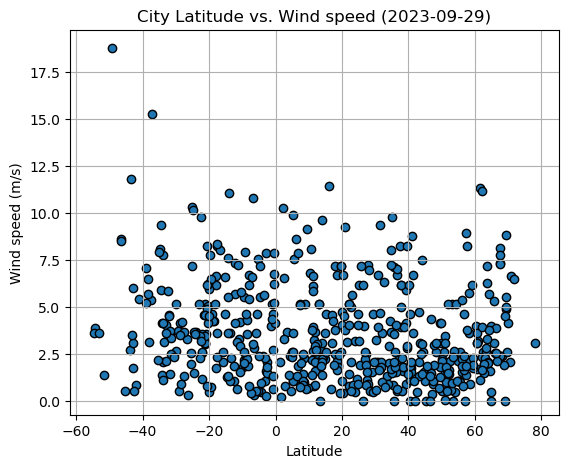

In [12]:
# Build the scatter plots for latitude vs. wind speed
latitudes = city_data_df["Lat"]
wind_speed = city_data_df["Wind Speed"]
plt.figure(figsize=(6.3,5))
plt.scatter(latitudes,wind_speed,edgecolor="black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind speed "+ time.strftime("(%Y-%m-%d)"))
plt.ylabel("Wind speed (m/s)")
plt.xlabel("Latitude")
plt.xlim(min(latitudes)-7,max(latitudes)+7)
plt.ylim(min(wind_speed)-0.75,max(wind_speed)+1)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
def linear_regression_plot(x_values, y_values, x_label, y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    print(f"The r-value is: {rvalue}")
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.figure(figsize=(6.3,5))
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values,"r-")
    plt.annotate(line_eq, xy=(min(x_values),min(y_values)), fontsize=15, color="red")
    plt.title(f"City {x_label} vs. {y_label} "+ time.strftime("(%Y-%m-%d)"))
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lihue,21.9789,-159.3672,29.58,74,40,5.14,US,1696027976
1,chibougamau,49.9168,-74.3659,18.79,52,0,3.09,CA,1696028003
3,bereeda,11.8704,51.0579,27.09,71,15,1.59,SO,1696028514
5,moyale,3.5167,39.0584,19.84,86,20,3.68,KE,1696028514
7,olonkinbyen,70.9221,-8.7187,2.44,83,100,6.62,SJ,1696027959


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0] 

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,port-aux-francais,-49.3500,70.2167,1.00,71,10,18.77,TF,1696027956
4,port alfred,-33.5906,26.8910,16.77,83,89,3.10,ZA,1696027970
6,fale old settlement,-9.3852,-171.2468,28.72,71,42,5.53,TK,1696027980
11,talara,-4.5772,-81.2719,24.42,69,0,5.53,PE,1696028245
13,puerto eldorado,-26.4084,-54.6946,20.03,79,72,0.29,AR,1696028515


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8191417816603644


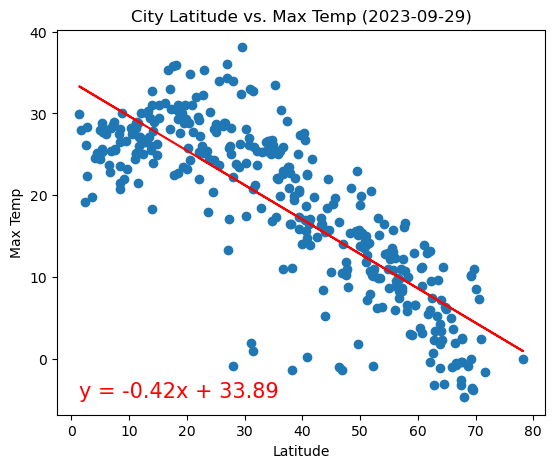

In [16]:
# Linear regression on Northern Hemisphere
linear_regression_plot(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"],
                       "Latitude","Max Temp")

The r-value is: 0.7993480745283276


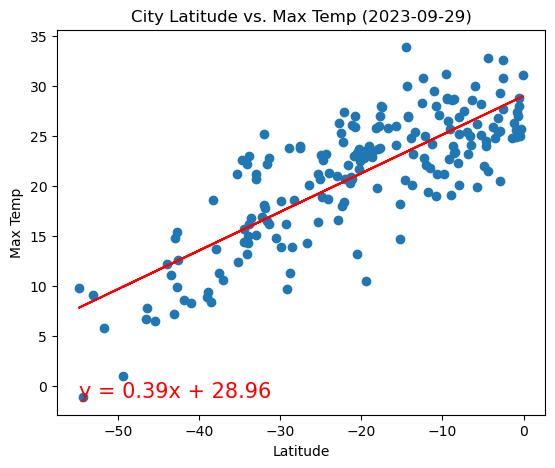

In [17]:
# Linear regression on Southern Hemisphere
linear_regression_plot(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"],
                         "Latitude","Max Temp")

**Discussion about the linear relationship:**

**Northern Hemisphere:**
Maximum temperature and latitude are strongly inversely correlated, according to the negative r-value of about -0.819. The maximum temperature tends to drop as latitude rises (going northward from the equator). Temperatures tend to drop as one begins to approach the North Pole and travel farther from the equator.

**Southern Hemisphere:**
A serious positive relationship between latitude and maximum temperature is shown by the positive r-value, which is roughly 0.799. The maximum temperature tends to rise as you descend in latitude (go closer to the equator).Temperatures increase near the equator and decrease as you approach the South Pole.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.08470945962598514


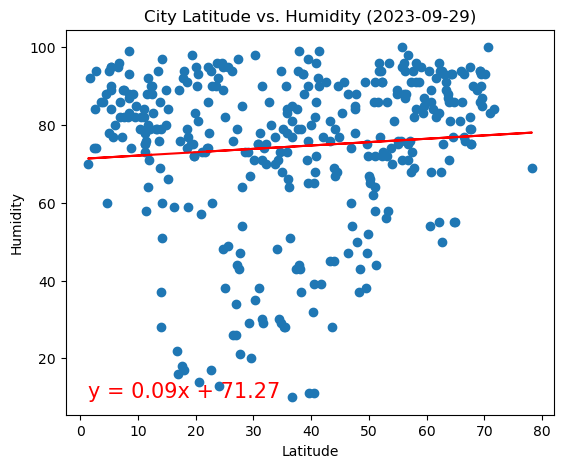

In [18]:
# Northern Hemisphere
linear_regression_plot(northern_hemi_df["Lat"], northern_hemi_df["Humidity"],
                       "Latitude","Humidity")

The r-value is: 0.013408848589289426


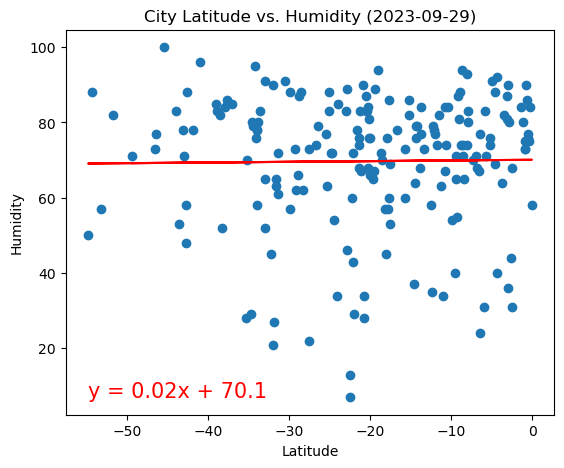

In [19]:
# Southern Hemisphere
linear_regression_plot(southern_hemi_df["Lat"], southern_hemi_df["Humidity"],
                         "Latitude","Humidity")

**Discussion about the linear relationship:**

**Northern Hemisphere:**
Latitude and humidity in the Northern Hemisphere have been shown to have a very weakly positive relationship, according to the positive r-value of around 0.085. There is only a very minor trend for humidity to rise as one ascend higher latitudes and move farther from the equator.Latitude alone is not a reliable indicator of humidity, according to this poor association.

**Southern Hemisphere:**
Latitude and humidity appear to have only a very weakly positive relationship, according to the positive r-value of around 0.013.Similar to the Northern Hemisphere, also shows a very minor tendency for humidity to rise as one approach the equator and does not appear to have a substantial correlation between latitude and humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.17622394014825443


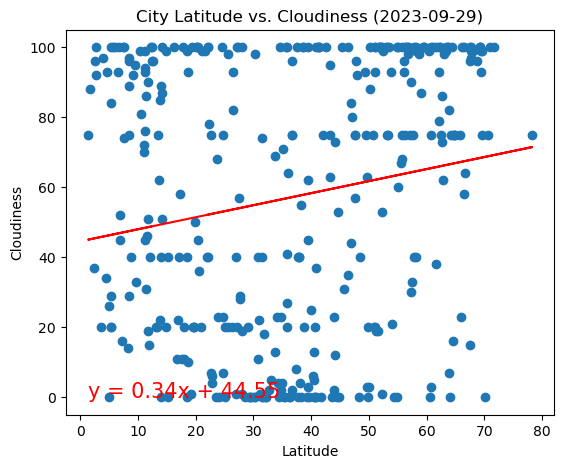

In [20]:
# Northern Hemisphere
linear_regression_plot(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"],
                       "Latitude","Cloudiness")

The r-value is: 0.09684590501676578


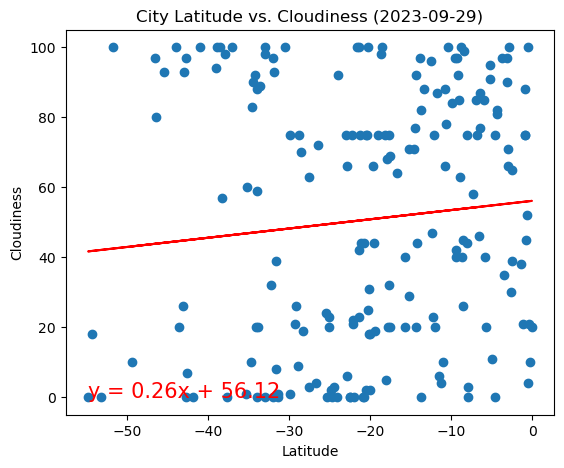

In [21]:
# Southern Hemisphere
linear_regression_plot(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"],
                         "Latitude","Cloudiness")

**Discussion about the linear relationship:**

**Northern Hemisphere:**
An approximate positive relationship between latitude and cloudiness is indicated by the positive r-value of 0.176. There is a low trend for cloudiness to rise as one ascend higher latitudes and move farther from the equator. Latitude alone does not strongly predict cloudiness, as seen by the correlation's continued weak.

**Southern Hemisphere:**
Latitude and cloudiness appear to be weakly positively correlated, according to the positive r-value of about 0.097. Closer to the equator, there is a modest trend for cloudiness to rise. This association is weak, similar to that in the Northern Hemisphere, indicating that latitude is not the main factor affecting cloudiness levels.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.027861871267536864


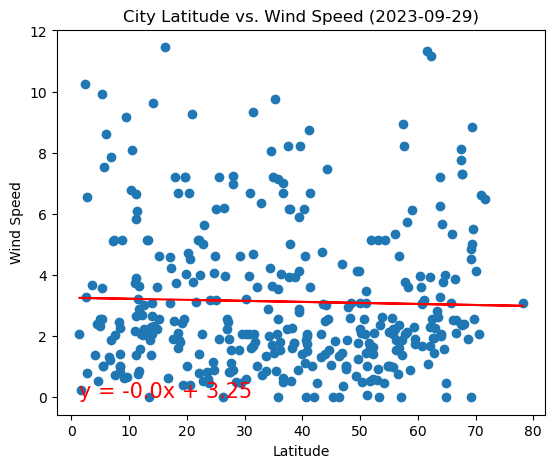

In [22]:
# Northern Hemisphere
linear_regression_plot(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"],
                       "Latitude","Wind Speed")

The r-value is: -0.15092363486655433


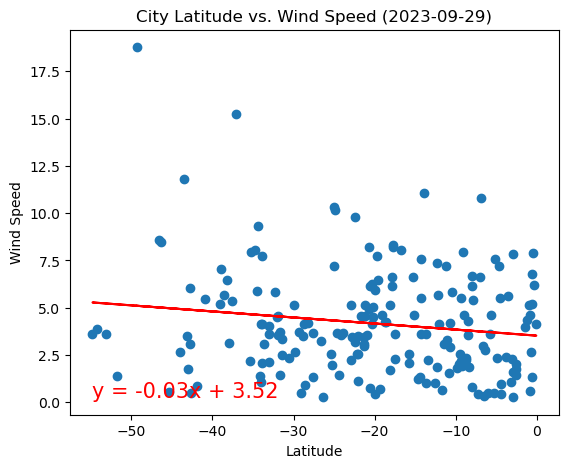

In [23]:
# Southern Hemisphere
linear_regression_plot(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"],
                         "Latitude","Wind Speed")

**Discussion about the linear relationship:** 

**Northern Hemisphere:**
Latitude and wind speed seem to have a very weak negative association, according to the negative r-value of about -0.028. As one go northward and away from the equator, there is a very little tendency for wind speed to decrease. The correlation is incredibly weak, indicating that latitude is not a reliable predictor of wind speed on itself.

**Southern Hemisphere:**
A slight negative relationship between latitude and wind speed is indicated by the negative r-value, which is around -0.151. As one moves closer to the equator, there is a little stronger trend for the wind speed to drop. The fact that this correlation is still slightly important, similar to in the Northern Hemisphere, shows that latitude is not a very reliable predictor of wind speed.